# Homework

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

## Q1. Downloading the data

In [2]:
df = pd.read_parquet('../data/raw/yellow_tripdata_2023-01.parquet')

In [3]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


**Answer**: There are 19 columns

## Q2. Computing duration

In [4]:
df["duration"] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda time: time.total_seconds() / 60)

In [5]:
df.duration.describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

**Answer**: The standard deviation of the trips duration in January is 42.59

## Q3. Dropping outliers

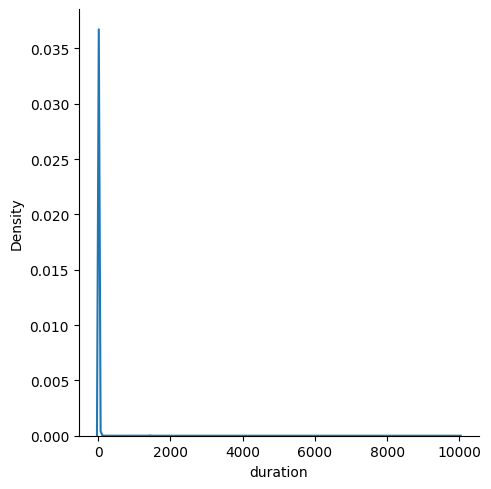

In [6]:
sns.displot(df.duration, kind="kde")

In [7]:
df.duration.describe(percentiles=[0.9, 0.95, 0.99])

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
50%      1.151667e+01
90%      2.794167e+01
95%      3.646667e+01
99%      5.725000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [8]:
count_before_filter = df.shape[0]

df = df[(df.duration >= 1) & (df.duration <= 60)]
count_after_filter = df.shape[0]
fraction = (count_after_filter / count_before_filter) * 100
print(fraction)

98.1220282212598


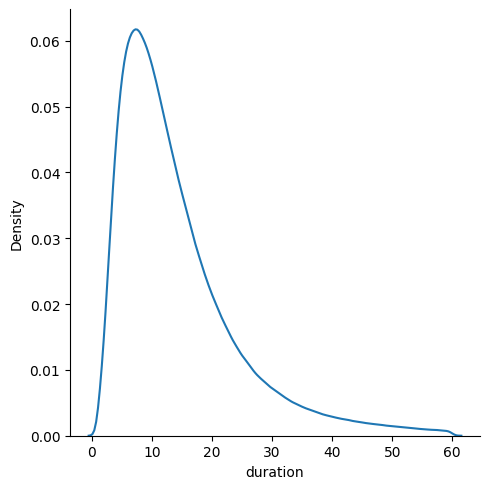

In [9]:
sns.displot(df.duration, kind="kde")

**Answer**: The fraction of records left after dropping the outliers is 98%

## Q4. One-hot encoding

In [10]:
categories = ["PULocationID", "DOLocationID"]

# Cast ids to string, because numerical variables will not be converted to OHE
df[categories] = df[categories].astype(str)
df.dtypes

/var/folders/n0/yghbzhlj11z9z99r3vnb246w0000gn/T/ipykernel_19598/2580822322.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categories] = df[categories].astype(str)


VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [11]:
feat_dicts = df[categories].to_dict(orient="records")

In [12]:
dv = DictVectorizer()
X_train = dv.fit_transform(feat_dicts)

In [13]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6018346 stored elements and shape (3009173, 515)>

**Answer**: The number of columns of the matrix is 515

## Q5. Training a model

In [14]:
target = "duration"
Y_train = df[target].values

In [15]:
Y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [16]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [17]:
Y_pred = model.predict(X_train)

/var/folders/n0/yghbzhlj11z9z99r3vnb246w0000gn/T/ipykernel_19598/1681720254.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_pred, label="prediction")
/var/folders/n0/yghbzhlj11z9z99r3vnb246w0000gn/T/ipykernel_19598/1681720254.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_train, lab

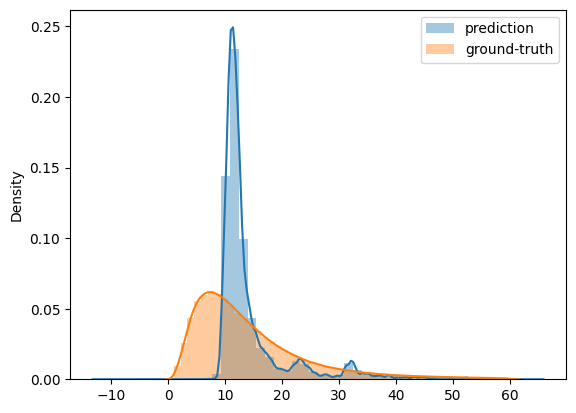

In [18]:
sns.distplot(Y_pred, label="prediction")
sns.distplot(Y_train, label="ground-truth")
plt.legend()

In [19]:
loss = root_mean_squared_error(Y_train, Y_pred)
print(loss)

7.649262183753913


**Answer**: The RMSE is 7.64

## Q6. Evaluating the model

In [20]:
df_valid = pd.read_parquet('../data/raw/yellow_tripdata_2023-02.parquet')

# Compute trip duration
df_valid["duration"] = df_valid.tpep_dropoff_datetime - df_valid.tpep_pickup_datetime
df_valid.duration = df_valid.duration.apply(lambda time: time.total_seconds() / 60)

# Drop outliers
df_valid = df_valid[(df_valid.duration >= 1) & (df_valid.duration <= 60)]
df_valid[categories] = df_valid[categories].astype(str)


In [21]:
feat_dicts = df_valid[categories].to_dict(orient="records")

X_valid = dv.transform(feat_dicts)

In [22]:
Y_valid = df_valid[target].values

In [23]:
Y_pred = model.predict(X_valid)
valid_loss = root_mean_squared_error(Y_valid, Y_pred)
print(valid_loss)

7.811812092681157


**Answer**: The RMSE on validation is 7.81